In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [2]:
def create_multi_gaussian_mixtures(D, D2, noise, N):
    """
    Create the Gaussian mixture dataset
    :param D: number of dimensions: (x1, x2, 0, .., 0) in R^D
    :param D2: number of non-zero features
    :param noise: intensity of the random noise (mean 0)
    :param N: number of elements to generate
    :return: dataset
    """
    if N % 4 != 0:
        raise ValueError("The number of elements within the dataset must be a multiple of 4")
    if D < 2:
        raise ValueError("The number of dimensions must be at least 2")
    if noise < 0:
        raise ValueError("Signal to noise ratio must be > 0")

    X = np.zeros((N, D))
    Y = np.zeros((N,))
    for i in range(N):
        x_relevant = np.random.choice([-1.0, 1.0], size=(D2,), replace=True)
        Y[i] = np.product(x_relevant)
        x_relevant += np.random.uniform(-noise, noise, size=(D2,))
        x_trash = np.zeros(shape=(D - D2,))
        X[i] = np.concatenate([x_relevant, x_trash])
    return X, Y

In [3]:
d = 24
epsilon = 0.8
X, y = create_multi_gaussian_mixtures(d, 3, epsilon, 16*d)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
nn = MLPClassifier(hidden_layer_sizes=(int(np.sqrt(d)), int(np.sqrt(d)), ), max_iter=10000)
for i in range(1):
    nn.partial_fit(X_train, y_train, classes=[-1.0, +1.0])
initial_params = nn.coefs_[0].copy()
for i in range(250):
    nn.partial_fit(X_train, y_train, classes=[-1.0, +1.0])
intermediate_params = nn.coefs_[0].copy()
for i in range(500):
    nn.partial_fit(X_train, y_train, classes=[-1.0, +1.0])
final_params = nn.coefs_[0].copy()

[Text(0.5, 0, '0'), Text(1.5, 0, '1'), Text(2.5, 0, '2'), Text(3.5, 0, '3')]

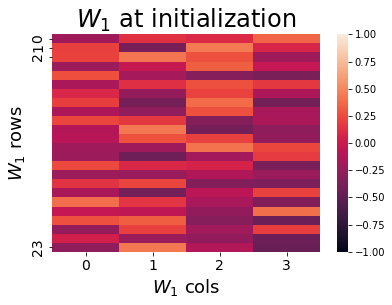

In [21]:
ax = sns.heatmap(initial_params, vmin=-1, vmax=1)
ax.set_title("$W_1$ at initialization", fontsize=24)
ax.set_ylabel('$W_1$ rows', fontsize=18)
ax.set_yticks([0.5, 1.5, 2.5, 23.5])
ax.set_yticklabels([0, 1, 2, 23], fontsize=14)
ax.set_xlabel('$W_1$ cols', fontsize=18)
ax.set_xticks([0.5, 1.5, 2.5, 3.5])
ax.set_xticklabels([0, 1, 2, 3], fontsize=14)

[Text(0.5, 0, '0'), Text(1.5, 0, '1'), Text(2.5, 0, '2'), Text(3.5, 0, '3')]

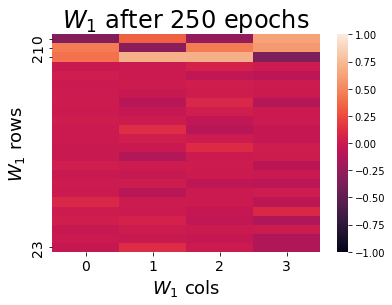

In [22]:
ax = sns.heatmap(intermediate_params, vmin=-1, vmax=1)
ax.set_title("$W_1$ after 250 epochs", fontsize=24)
ax.set_ylabel('$W_1$ rows', fontsize=18)
ax.set_yticks([0.5, 1.5, 2.5, 23.5])
ax.set_yticklabels([0, 1, 2, 23], fontsize=14)
ax.set_xlabel('$W_1$ cols', fontsize=18)
ax.set_xticks([0.5, 1.5, 2.5, 3.5])
ax.set_xticklabels([0, 1, 2, 3], fontsize=14)

[Text(0.5, 0, '0'), Text(1.5, 0, '1'), Text(2.5, 0, '2'), Text(3.5, 0, '3')]

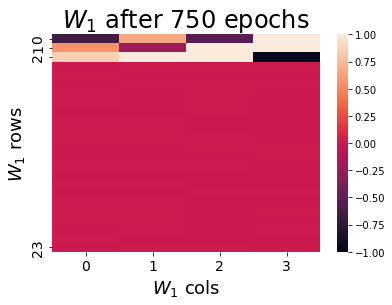

In [23]:
ax = sns.heatmap(final_params, vmin=-1, vmax=1)
ax.set_title("$W_1$ after 750 epochs", fontsize=24)
ax.set_ylabel('$W_1$ rows', fontsize=18)
ax.set_yticks([0.5, 1.5, 2.5, 23.5])
ax.set_yticklabels([0, 1, 2, 23], fontsize=14)
ax.set_xlabel('$W_1$ cols', fontsize=18)
ax.set_xticks([0.5, 1.5, 2.5, 3.5])
ax.set_xticklabels([0, 1, 2, 3], fontsize=14)